## 단순 선형회귀

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 아버지와 아들의 키 - Galton

In [2]:
df = pd.read_csv('data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 전처리
    - 아버지와 아들의 키만 발췌
    - 컬럼명을 Father, Son 으로 변경
    - 단위(1 inch --> 2.54 cm) 변경

In [3]:
# filtering
df = df[df.Gender == 'M']
df.head(3)

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4


In [4]:
# selection
df = df[['Father', 'Height']]
# 컬럼명 변경
df.columns = ['Father', 'Son']
df.tail(3)

,Father,Son
892,68.5,68.7
893,68.5,68.5
894,68.5,67.7


In [5]:
# 단위 변경
df = df *2.54
df.tail(3)

,Father,Son
892,173.99,174.498
893,173.99,173.990
894,173.99,171.958


- 산점도

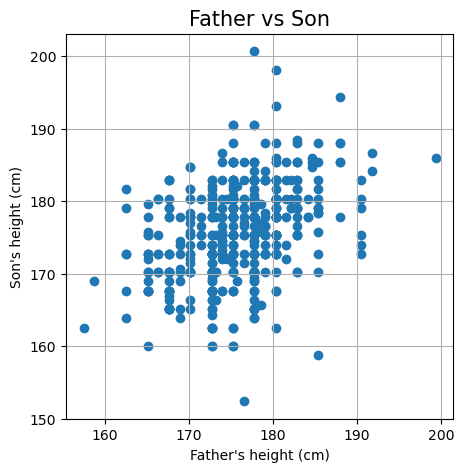

In [9]:
plt.figure(figsize=(5,5))
plt.scatter(df.Father, df.Son)                     # 독립변수 = X = 아버지 / 종속변수 = Y = 아들
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son', fontsize=15)
plt.grid()
plt.show()

- 회귀선

In [10]:
weight, bias = np.polyfit(df.Father, df.Son, deg=1)     # X, Y degree(차수) #deg=1 : 1차식
weight, bias

(0.4477479176030235, 97.1776370073937)

In [12]:
np.polyfit(df.Father, df.Son, 2)

array([6.10561389e-04, 2.32817725e-01, 1.16071746e+02])

In [13]:
# X 축의 최소값, 최대값
df.Father.min(), df.Father.max()

(157.48, 199.39000000000001)

In [15]:
# 회귀선 (직선)
xs = np.array([df.Father.min(), df.Father.max()])
ys = weight * xs + bias
ys

array([167.68897907, 186.4540943 ])

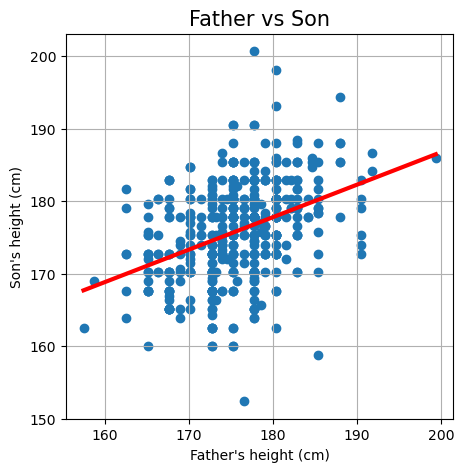

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(df.Father, df.Son)                     # 독립변수 = X = 아버지 / 종속변수 = Y = 아들
plt.plot(xs, ys, c='red', lw=3)
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son', fontsize=15)
plt.grid()
plt.show()

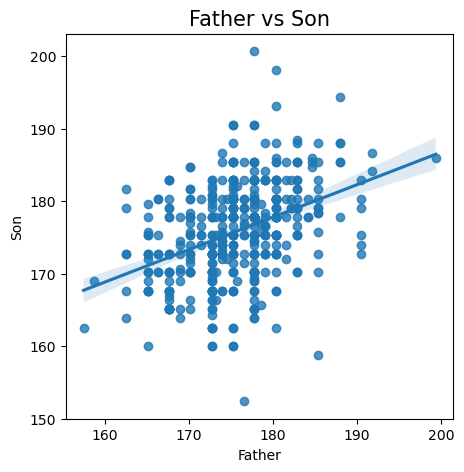

In [18]:
plt.figure(figsize=(5,5))
sns.regplot(x='Father', y='Son', data=df)
plt.title('Father vs Son', fontsize=15)
plt.show()